In [19]:
#Import package pandas for data analysis
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
from numpy import int64
from numpy import float64
from numpy import datetime64
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
import matplotlib.dates as dates
# Allows plots to appear directly in the notebook.
%matplotlib inline
# For dealing with some Accented characters (in Irish Place names)
import unidecode
# Date/time functionality
import datetime
import time
#for trigonometic calculations
import math
# Check if files exist
from os.path import exists
from os import makedirs
# System specific parameters and functions
import sys
# look at some z-scores for inspecting outliers.
from scipy import stats
import seaborn as sns
# lookup lat/long and convert lat/long to national grid references.
#import geopy
#import pyproj

from patsy import dmatrices
from sklearn import metrics
#binary encoding by using the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
#from sklearn.tree import export_text

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#import graphviz
#from graphviz import Source
#to read all CSV files in a folder
import os
import glob
import pickle

In [2]:
#method to read chunks from a file and create a dataframe list.
def get_chunks(x):
    """x=[location, dtypes, datecolumns ,date_parser_func, cols]
    exp:mydateparser = lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S")
    exp:dtypes={'TRIPID' :'category','PROGRNUMBER':'int16','STOPPOINTID':'category','PLANNEDTIME_ARR':'int64','PLANNEDTIME_DEP':'int64','ACTUALTIME_ARR':'int64','ACTUALTIME_DEP':'int64','DIFFERENCETIME_ARR':'int64','DIFFERENCETIME_DEP':'int64','LINEID':'category','ROUTEID':'category','DIRECTION':'category','TRIPS_TIME_PROPORTION':'float32','TOTAL_JOURNEY_TIME':'int16','TIME_OF_DAY':'category','DAY_OF_WEEK':'category'}
    exp:cols=['Date time','Temperature','Wind Speed','Precipitation','Cloud Cover']
    exp:x=['/Chunks/DBUS/QP_Implementation',dtypes,['ACTUALTIME_ARR_DATETIME'],mydateparser, cols]"""
    path = x[0]
    chunk_folder = glob.glob(os.path.join(path, "*.csv"))
    chunk_list=[]
    counter=0
    for filename in chunk_folder:
        df_chunk = pd.read_csv(filename, low_memory=False, dtype=x[1])
        chunk_list.append(df_chunk)
        print('Index at chunk_list',counter,' is ', filename, ': ',df_chunk.shape)
        counter+=1
    return chunk_list
#chunk_dbus_list=get_chunks(arg_list)

In [3]:
def printMetrics(actualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(actualVal, predictions))
    print("MSE: ", metrics.mean_squared_error(actualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(actualVal, predictions)**0.5)
    print("R²: ", metrics.r2_score(actualVal, predictions))

In [4]:
# set out criteria for loading in chunks
dtype={'PLANNEDTIME_DEP':'int64',
       'ROUTEID':'category',
       'TOTAL_JOURNEY_TIME':'int16',
       'rain':'float16',
       'temp':'float16',
       'wet_bulb_temp(C)':'float16',
       'dew_pt_temp(C)':'float16',
       'vapour_pressure(hPa)':'float16',
       'humidity(%)':'int16',
       'sea_lvl_pressure(hPa)':'float16',
       'sin_hour_of_day': 'float32',
       'cos_hour_of_day': 'float32',
       'friday':'int16',
       'monday':'int16',
       'saturday':'int16',
       'sunday':'int16',
       'thursday':'int16',
       'tuesday':'int16',
       'wednesday':'int16'}


data_list = ["../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/", dtype]

# apply function
chunks = get_chunks(data_list)

Index at chunk_list 0  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/18_3.csv :  (3896, 19)
Index at chunk_list 1  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/67_6.csv :  (4001, 19)
Index at chunk_list 2  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/142_9.csv :  (252, 17)
Index at chunk_list 3  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/17_16.csv :  (307, 16)
Index at chunk_list 4  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/46A_74.csv :  (11186, 19)
Index at chunk_list 5  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/122_14.csv :  (4164, 19)
Index at chunk_list 6  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/150_8.csv :  (4907, 19)
Index at chunk_list 7  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/33X_49.csv :  (181, 17)
Index at chunk_list 8  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/83_19.csv :  (1051, 16)
Index at chunk_list 9  is  ../../Pelin/Chunks/D

Index at chunk_list 78  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/17A_17.csv :  (1744, 17)
Index at chunk_list 79  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/14_16.csv :  (5208, 19)
Index at chunk_list 80  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/15A_83.csv :  (5097, 19)
Index at chunk_list 81  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/39_21.csv :  (4147, 19)
Index at chunk_list 82  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/151_18.csv :  (831, 19)
Index at chunk_list 83  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/238_15.csv :  (1521, 19)
Index at chunk_list 84  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/79A_27.csv :  (2485, 19)
Index at chunk_list 85  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/7_73.csv :  (781, 19)
Index at chunk_list 86  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/69_47.csv :  (592, 18)
Index at chunk_list 87  is  ../../Pe

Index at chunk_list 173  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/41C_78.csv :  (4171, 19)
Index at chunk_list 174  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/65B_66.csv :  (1992, 19)
Index at chunk_list 175  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/49_27.csv :  (3171, 19)
Index at chunk_list 176  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/38_14.csv :  (2684, 19)
Index at chunk_list 177  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/18_4.csv :  (3903, 19)
Index at chunk_list 178  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/39A_42.csv :  (238, 19)
Index at chunk_list 179  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/61_108.csv :  (1818, 19)
Index at chunk_list 180  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/102_10.csv :  (299, 18)
Index at chunk_list 181  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/68_85.csv :  (529, 19)
Index at chunk_list 182  is

Index at chunk_list 256  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/7B_93.csv :  (209, 17)
Index at chunk_list 257  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/27A_4.csv :  (3045, 19)
Index at chunk_list 258  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/59_10.csv :  (1444, 19)
Index at chunk_list 259  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/75_17.csv :  (2676, 19)
Index at chunk_list 260  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/44B_60.csv :  (207, 17)
Index at chunk_list 261  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/13_67.csv :  (2934, 19)
Index at chunk_list 262  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/66_17.csv :  (2068, 19)
Index at chunk_list 263  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/31_15.csv :  (3825, 19)
Index at chunk_list 264  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/31A_26.csv :  (861, 19)
Index at chunk_list 265  is  

In [5]:
df = chunks[0].copy()
df.drop('ROUTEID', inplace=True, axis=1)

In [6]:
df.corr()

,PLANNEDTIME_DEP,TOTAL_JOURNEY_TIME,rain,temp,wet_bulb_temp(C),dew_pt_temp(C),vapour_pressure(hPa),humidity(%),sea_lvl_pressure(hPa),sin_hour_of_day,cos_hour_of_day,friday,monday,saturday,sunday,thursday,tuesday,wednesday
PLANNEDTIME_DEP,1.000000,-0.408809,-0.031466,-0.113330,-0.086217,-0.033691,-0.028066,0.140259,0.026845,-0.757035,0.845279,-0.004131,0.052796,-0.029842,0.194710,-0.065647,-0.066534,-0.124025
TOTAL_JOURNEY_TIME,-0.408809,1.000000,0.064654,0.013831,-0.003432,-0.028778,-0.042938,-0.059007,-0.072582,0.120275,-0.402013,0.228493,-0.027842,-0.305520,-0.335323,0.216564,0.220095,0.261458
rain,-0.031466,0.064654,1.000000,-0.078660,-0.023350,0.058060,0.049301,0.231015,-0.214664,0.013172,-0.025978,0.014414,-0.027833,-0.019474,0.010846,-0.012527,0.039174,0.000422
temp,-0.113330,0.013831,-0.078660,1.000000,0.965776,0.795475,0.792901,-0.564204,0.299353,-0.022116,-0.204255,-0.004256,-0.065003,0.077008,0.021952,-0.017620,-0.029876,-0.039950
wet_bulb_temp(C),-0.086217,-0.003432,-0.023350,0.965776,1.000000,0.923169,0.917206,-0.340248,0.229192,-0.005421,-0.143402,-0.020729,-0.066276,0.085356,0.033239,-0.021651,-0.035687,-0.039006
dew_pt_temp(C),-0.033691,-0.028778,0.058060,0.795475,0.923169,1.000000,0.985501,0.041874,0.090588,0.020819,-0.031294,-0.040358,-0.063118,0.087620,0.042421,-0.023457,-0.036102,-0.033678
vapour_pressure(hPa),-0.028066,-0.042938,0.049301,0.792901,0.917206,0.985501,1.000000,0.022066,0.127673,0.013520,-0.028841,-0.049775,-0.054216,0.089524,0.053080,-0.036600,-0.041790,-0.029417
humidity(%),0.140259,-0.059007,0.231015,-0.564204,-0.340248,0.041874,0.022066,1.000000,-0.386972,0.073000,0.299453,-0.045935,0.016339,-0.009075,0.016620,0.003084,-0.001884,0.026634
sea_lvl_pressure(hPa),0.026845,-0.072582,-0.214664,0.299353,0.229192,0.090588,0.127673,-0.386972,1.000000,-0.006040,0.023886,-0.007865,0.056467,0.001526,0.055242,-0.002507,-0.084115,-0.034944
sin_hour_of_day,-0.757035,0.120275,0.013172,-0.022116,-0.005421,0.020819,0.013520,0.073000,-0.006040,1.000000,-0.406257,-0.051921,0.019275,0.057846,-0.194155,0.040696,0.048779,0.120173


In [7]:
# split into X and Y -> features and target
y = pd.DataFrame(df['TOTAL_JOURNEY_TIME'])
X = df.drop(['TOTAL_JOURNEY_TIME'], axis=1)

# take random 70/30 split
# maintaining the random state with an integer argument so we can use this arrangement again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

# print the number of rows in each dataset to ensure the sample was done correctly
print(f"Original set: {df.shape}")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Original set: (3896, 18)
Training set: (2727, 17)
Testing set: (1169, 17)


# Model training

In [8]:
features = list(X_train)
# create the linear regression model
# only have continuous features so no need to exclude categoricals

LR = LinearRegression().fit(X_train, y_train)

print("Features                      Coefficients\n=================================================")
for it, feature in enumerate(features):
    print(f"{feature}               {LR.coef_[0][it]}")
    
print("\nIntercept: \n", LR.intercept_)

feature_importance = pd.DataFrame({'feature': features, 'importance':abs(LR.coef_.reshape(-1))})
feature_importance.sort_values('importance', ascending=False)

Features                      Coefficients
PLANNEDTIME_DEP               -0.060377691342932874
rain               110.11612015361182
temp               -45.47529130178701
wet_bulb_temp(C)               121.23062101382365
dew_pt_temp(C)               -2.2429247299119446
vapour_pressure(hPa)               -97.89318167518483
humidity(%)               7.652432414508368
sea_lvl_pressure(hPa)               2.785641363020405
sin_hour_of_day               -984.2551319449647
cos_hour_of_day               288.17032693513454
friday               383.59056121554653
monday               -98.57445273657166
saturday               -715.6251213591585
sunday               -874.3984990727544
thursday               359.20206577775195
tuesday               444.7003289259683
wednesday               501.1051172492165

Intercept: 
 [4473.689554]


,feature,importance
8,sin_hour_of_day,984.255132
13,sunday,874.398499
12,saturday,715.625121
16,wednesday,501.105117
15,tuesday,444.700329
10,friday,383.590561
14,thursday,359.202066
9,cos_hour_of_day,288.170327
3,wet_bulb_temp(C),121.230621
1,rain,110.116120


## Evaluate on training set

In [9]:
# make prediction and display results
LRprediction = LR.predict(X_train)
print("First 10 linear regression predictions:\n")
actualVpredicted = pd.concat([y_train, pd.DataFrame(LRprediction, columns=["Predicted"], index=y_train.index)], axis=1)
actualVpredicted.head(10)

First 10 linear regression predictions:



,TOTAL_JOURNEY_TIME,Predicted
2289,4610,4869.565088
2344,3283,3601.930433
3114,5747,4778.178193
3305,2386,2497.553310
2347,3007,3206.582590
1988,3463,3407.613617
681,4091,4234.870232
2418,5500,4954.748207
250,3841,4681.162407
3570,3531,3002.507624


In [10]:
# compute mse, rmse and mae
mse = mean_squared_error(y_train, LRprediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, LRprediction)
r2 = r2_score(y_train, LRprediction)

# show results
print("Evaluation metrics on training data:\n")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")
print(f"R sqared: {r2}")

Evaluation metrics on training data:

Root mean squared error: 768.0736455482638
Mean absolute error: 546.3839819478919
R sqared: 0.5349074688343272


## Evaluate on hold-out set

In [11]:
# Predicted price on test set
LRtest_prediction = LR.predict(X_test)
print("Linear regression prediction on test data:")
mod_test_actualVpredicted = pd.concat([y_test, pd.DataFrame(LRtest_prediction, columns=["Predicted"], index=y_test.index)], axis=1)
mod_test_actualVpredicted.head(10)

Linear regression prediction on test data:


,TOTAL_JOURNEY_TIME,Predicted
1413,3650,3449.336126
3362,3966,3852.048670
1787,4049,3523.343065
1396,4025,3727.976859
724,2348,3625.475002
1410,2728,2547.763797
710,6436,4930.068440
2011,4211,4834.819732
2805,2526,3490.116674
453,2619,3939.308676


In [12]:
# compute mse, rmse and mae
t_mse = mean_squared_error(y_test, LRtest_prediction)
t_rmse = np.sqrt(t_mse)
t_mae = mean_absolute_error(y_test, LRtest_prediction)
t_r2 = r2_score(y_test, LRtest_prediction)

# show results
print("Evaluation metrics on training data:\n")
print(f"Root mean squared error: {t_rmse}")
print(f"Mean absolute error: {t_mae}")
print(f"r^2: {t_r2}")

Evaluation metrics on training data:

Root mean squared error: 769.6789094187598
Mean absolute error: 570.2695119220922
r^2: 0.5408598337979247


## 5-fold cross validation
### MAE

In [13]:
mae_scores = -cross_val_score(LinearRegression(), X, y, scoring='neg_mean_absolute_error', cv=5)
CV_mae = np.mean(mae_scores)
CV_mae_std = np.std(mae_scores)

print("===== MAE =====\n")
print("Avg MAE score over 5 folds:", CV_mae)
print("Stddev MAE score over 5 folds:", CV_mae_std)
print("Variance over 5 folds:", np.std(mae_scores)*2)

===== MAE =====

Avg MAE score over 5 folds: 573.7456668541867
Stddev MAE score over 5 folds: 40.45893565219496
Variance over 5 folds: 80.91787130438992


### RMSE

In [14]:
rmse_scores = -cross_val_score(LinearRegression(), X, y, scoring='neg_root_mean_squared_error', cv=5)
CV_rmse = np.mean(rmse_scores)
CV_rmse_std = np.std(rmse_scores)

print("===== RMSE =====\n")
print("Avg RMSE score over 5 folds:", CV_rmse)
print("Stddev RMSE score over 5 folds:", CV_rmse_std)
print("Variance over 5 folds:", np.std(rmse_scores)*2)

===== RMSE =====

Avg RMSE score over 5 folds: 794.9996209460782
Stddev RMSE score over 5 folds: 58.31243232726411
Variance over 5 folds: 116.62486465452822


### r2

In [15]:
r2_scores = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=5)
CV_r2 = np.mean(r2_scores)
CV_r2_std = np.std(r2_scores)

print("===== r^2 =====\n")
print("Avg r^2 score over 5 folds:", CV_r2)
print("Stddev r^2 score over 5 folds:", CV_r2_std)
print("Variance over 5 folds:", np.std(r2_scores)*2)

===== r^2 =====

Avg r^2 score over 5 folds: 0.494461774843054
Stddev r^2 score over 5 folds: 0.043079901382247154
Variance over 5 folds: 0.08615980276449431


In [16]:
results = {
    "": ["MAE", "RMSE", "r^2"],
    "Train/test split": [str(round(t_mae,2)), str(round(t_rmse,2)), str(round(t_r2,4))],
    "5-fold CV (std dev.)": [f"{str(round(CV_mae,2))} ({str(round(CV_mae_std,2))})", f"{str(round(CV_rmse,2))} ({str(round(CV_rmse_std,2))})",f"{str(round(CV_r2,4))} ({str(round(CV_r2_std,4))})"]
}

resultsdf = pd.DataFrame(results)
resultsdf = resultsdf.set_index("")
print(f"Average total journey time in training set: {y_train['TOTAL_JOURNEY_TIME'].mean()}")
print(f"Average total journey time in full set: {y['TOTAL_JOURNEY_TIME'].mean()}\n\n")
print("Performance of linear regression models:")
resultsdf

Average total journey time in training set: 4045.3296662999633
Average total journey time in full set: 4046.632700205339


Performance of linear regression models:


,Train/test split,5-fold CV (std dev.)
,,
MAE,570.27,573.75 (40.46)
RMSE,769.68,795.0 (58.31)
r^2,0.5409,0.4945 (0.0431)


# Exploring continuous feature relationships

When two features (neither the target feature) are highly correlated, it is likely that they both have the same affect on the target feature. This can lead to redundancy if they are both included in the model training, as they are unlikely to add anything original to the model and even insome cases pose a risk of overfitting (Vishal R, 2019)!

This section aims to experiment with the removal of redundant features that are highly correlated with others, to assess the gain (or loss) of model performance. 

We have no categorical features to consider so only need to look at correlation matrix. I will compute the correlation of all continuous features in the X training set.

In [17]:
# correlation of all pairs of continuous features
X_train.corr()

,PLANNEDTIME_DEP,rain,temp,wet_bulb_temp(C),dew_pt_temp(C),vapour_pressure(hPa),humidity(%),sea_lvl_pressure(hPa),sin_hour_of_day,cos_hour_of_day,friday,monday,saturday,sunday,thursday,tuesday,wednesday
PLANNEDTIME_DEP,1.000000,-0.028049,-0.122976,-0.095917,-0.041982,-0.037172,0.148759,0.025747,-0.754081,0.850167,0.001753,0.022970,-0.021711,0.199148,-0.068859,-0.080250,-0.102800
rain,-0.028049,1.000000,-0.073543,-0.018350,0.061857,0.055279,0.226241,-0.208744,0.006070,-0.029895,0.011785,-0.043627,-0.013655,0.007265,-0.009474,0.056943,-0.007305
temp,-0.122976,-0.073543,1.000000,0.965682,0.794249,0.791829,-0.565025,0.295007,-0.013170,-0.204491,0.002504,-0.059909,0.060768,0.033507,-0.019856,-0.029476,-0.040615
wet_bulb_temp(C),-0.095917,-0.018350,0.965682,1.000000,0.922567,0.916797,-0.340976,0.227628,0.004262,-0.144117,-0.016185,-0.065568,0.066964,0.045580,-0.016644,-0.034533,-0.038615
dew_pt_temp(C),-0.041982,0.061857,0.794249,0.922567,1.000000,0.985465,0.042890,0.092373,0.029096,-0.033217,-0.040750,-0.070783,0.068651,0.054367,-0.007717,-0.033809,-0.030406
vapour_pressure(hPa),-0.037172,0.055279,0.791829,0.916797,0.985465,1.000000,0.022380,0.131434,0.022184,-0.033379,-0.048744,-0.057547,0.069120,0.065701,-0.022110,-0.042852,-0.025062
humidity(%),0.148759,0.226241,-0.565025,-0.340976,0.042890,0.022380,1.000000,-0.376308,0.063972,0.298535,-0.056590,-0.003540,-0.007466,0.016529,0.024877,0.003812,0.027639
sea_lvl_pressure(hPa),0.025747,-0.208744,0.295007,0.227628,0.092373,0.131434,-0.376308,1.000000,-0.009139,0.026966,-0.008305,0.110402,-0.009235,0.040555,-0.010968,-0.088626,-0.031733
sin_hour_of_day,-0.754081,0.006070,-0.013170,0.004262,0.029096,0.022184,0.063972,-0.009139,1.000000,-0.411260,-0.058673,0.038504,0.053722,-0.185170,0.039141,0.064489,0.089635
cos_hour_of_day,0.850167,-0.029895,-0.204491,-0.144117,-0.033217,-0.033379,0.298535,0.026966,-0.411260,1.000000,-0.047817,0.043960,-0.017913,0.126353,-0.031561,-0.046628,-0.046218


Feature pairs that have high correlation:

- PLANNEDTIME_DEP : sin_hour_of_day..........-0.754087
- PLANNEDTIME_DEP : cos_hour_of_day..........0.850175
- temp : wet_bulb_temp(C).................................0.965682
- temp : vapour_pressure(hPa)............................0.791829
- vapour_pressure(hPa) : wet_bulb_temp(C).......0.916797

For this reason I am going to drop wet_buld_temp(C) and vapour_pressure(hPa).

In [18]:
list(X_train)

['PLANNEDTIME_DEP',
 'rain',
 'temp',
 'wet_bulb_temp(C)',
 'dew_pt_temp(C)',
 'vapour_pressure(hPa)',
 'humidity(%)',
 'sea_lvl_pressure(hPa)',
 'sin_hour_of_day',
 'cos_hour_of_day',
 'friday',
 'monday',
 'saturday',
 'sunday',
 'thursday',
 'tuesday',
 'wednesday']

In [19]:
modX_train = X_train.drop(['wet_bulb_temp(C)', 'vapour_pressure(hPa)'], axis=1)
list(modX_train)

['PLANNEDTIME_DEP',
 'rain',
 'temp',
 'dew_pt_temp(C)',
 'humidity(%)',
 'sea_lvl_pressure(hPa)',
 'sin_hour_of_day',
 'cos_hour_of_day',
 'friday',
 'monday',
 'saturday',
 'sunday',
 'thursday',
 'tuesday',
 'wednesday']

**Now to do the same to the test data**

In [20]:
modX_test = X_test.drop(['wet_bulb_temp(C)', 'vapour_pressure(hPa)'], axis=1)
list(modX_test)

['PLANNEDTIME_DEP',
 'rain',
 'temp',
 'dew_pt_temp(C)',
 'humidity(%)',
 'sea_lvl_pressure(hPa)',
 'sin_hour_of_day',
 'cos_hour_of_day',
 'friday',
 'monday',
 'saturday',
 'sunday',
 'thursday',
 'tuesday',
 'wednesday']

# Model Training

In [21]:
mod_features = list(modX_train)
# create the linear regression model
# only have continuous features so no need to exclude categoricals

modLR = LinearRegression().fit(modX_train, y_train)

print("Features                      Coefficients\n=================================================")
for it, feature in enumerate(mod_features):
    print(f"{feature}               {modLR.coef_[0][it]}")
    
print("\nIntercept: \n", modLR.intercept_)

feature_importance = pd.DataFrame({'feature': mod_features, 'importance':abs(modLR.coef_.reshape(-1))})
feature_importance.sort_values('importance', ascending=False)

Features                      Coefficients
PLANNEDTIME_DEP               -0.06048183690079416
rain               111.58683809003766
temp               13.674697678614056
dew_pt_temp(C)               -14.126484982394839
humidity(%)               7.263259712050896
sea_lvl_pressure(hPa)               1.9187359005808684
sin_hour_of_day               -981.7470814936557
cos_hour_of_day               292.0121326261898
friday               389.45965178726635
monday               -103.94233789914985
saturday               -717.2367135065733
sunday               -879.1288143879622
thursday               369.30326664616473
tuesday               447.1062886995854
wednesday               494.43865866066966

Intercept: 
 [4899.94416306]


,feature,importance
6,sin_hour_of_day,981.747081
11,sunday,879.128814
10,saturday,717.236714
14,wednesday,494.438659
13,tuesday,447.106289
8,friday,389.459652
12,thursday,369.303267
7,cos_hour_of_day,292.012133
1,rain,111.586838
9,monday,103.942338


 ## Evaluate on training set

In [22]:
# make prediction and display results
modLRprediction = modLR.predict(modX_train)
print("First 10 linear regression predictions:\n")
actualVpredicted = pd.concat([y_train, pd.DataFrame(modLRprediction, columns=["Predicted"], index=y_train.index)], axis=1)
actualVpredicted.head(10)

First 10 linear regression predictions:



,TOTAL_JOURNEY_TIME,Predicted
2289,4610,4886.020235
2344,3283,3740.903641
3114,5747,4770.402362
3305,2386,2468.686295
2347,3007,3310.504109
1988,3463,3504.740860
681,4091,4327.448116
2418,5500,5041.245516
250,3841,4730.752302
3570,3531,2977.400875


In [23]:
# compute mse, rmse and mae
mod_mse = mean_squared_error(y_train, modLRprediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, modLRprediction)
r2 = r2_score(y_train, modLRprediction)

# show results
print("Evaluation metrics on training data:\n")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")
print(f"R sqared: {r2}")

Evaluation metrics on training data:

Root mean squared error: 768.0736455482638
Mean absolute error: 547.1802180523825
R sqared: 0.5330605914735647


## Evaluate on hold-out set

In [24]:
# Predicted price on test set
modLRtest_prediction = modLR.predict(modX_test)
print("Linear regression prediction on test data:")
mod_test_actualVpredicted = pd.concat([y_test, pd.DataFrame(modLRtest_prediction, columns=["Predicted"], index=y_test.index)], axis=1)
mod_test_actualVpredicted.head(10)

Linear regression prediction on test data:


,TOTAL_JOURNEY_TIME,Predicted
1413,3650,3456.098574
3362,3966,3827.579849
1787,4049,3537.780396
1396,4025,3781.404308
724,2348,3639.952280
1410,2728,2496.733076
710,6436,5154.140093
2011,4211,4815.359988
2805,2526,3435.095938
453,2619,3990.664686


In [25]:
# compute mse, rmse and mae
t_mse = mean_squared_error(y_test, modLRtest_prediction)
t_rmse = np.sqrt(t_mse)
t_mae = mean_absolute_error(y_test, modLRtest_prediction)
t_r2 = r2_score(y_test, modLRtest_prediction)

# show results
print("Evaluation metrics on training data:\n")
print(f"Root mean squared error: {t_rmse}")
print(f"Mean absolute error: {t_mae}")
print(f"r^2: {t_r2}")

Evaluation metrics on training data:

Root mean squared error: 770.3728060750603
Mean absolute error: 570.9270380478232
r^2: 0.5400315937728708


## 5-fold cross-validation

In [26]:
# perform same processing that was done on train-test splits on original set
modX = X.drop(['wet_bulb_temp(C)', 'vapour_pressure(hPa)'], axis=1)
list(modX)

['PLANNEDTIME_DEP',
 'rain',
 'temp',
 'dew_pt_temp(C)',
 'humidity(%)',
 'sea_lvl_pressure(hPa)',
 'sin_hour_of_day',
 'cos_hour_of_day',
 'friday',
 'monday',
 'saturday',
 'sunday',
 'thursday',
 'tuesday',
 'wednesday']

### MAE

In [27]:
mae_scores = -cross_val_score(LinearRegression(), modX, y, scoring='neg_mean_absolute_error', cv=5)
CV_mae = np.mean(mae_scores)
CV_mae_std = np.std(mae_scores)

print("===== MAE =====\n")
print("Avg MAE score over 5 folds:", CV_mae)
print("Stddev MAE score over 5 folds:", CV_mae_std)
print("Variance over 5 folds:", np.std(mae_scores)*2)

===== MAE =====

Avg MAE score over 5 folds: 573.3031976819332
Stddev MAE score over 5 folds: 39.804960495844256
Variance over 5 folds: 79.60992099168851


### RMSE

In [28]:
rmse_scores = -cross_val_score(LinearRegression(), modX, y, scoring='neg_root_mean_squared_error', cv=5)
CV_rmse = np.mean(rmse_scores)
CV_rmse_std = np.std(rmse_scores)

print("===== RMSE =====\n")
print("Avg RMSE score over 5 folds:", CV_rmse)
print("Stddev RMSE score over 5 folds:", CV_rmse_std)
print("Variance over 5 folds:", np.std(rmse_scores)*2)

===== RMSE =====

Avg RMSE score over 5 folds: 794.619251409979
Stddev RMSE score over 5 folds: 60.64667800048247
Variance over 5 folds: 121.29335600096493


### r2

In [29]:
r2_scores = cross_val_score(LinearRegression(), modX, y, scoring='r2', cv=5)
CV_r2 = np.mean(r2_scores)
CV_r2_std = np.std(r2_scores)

print("===== r^2 =====\n")
print("Avg r^2 score over 5 folds:", CV_r2)
print("Stddev r^2 score over 5 folds:", CV_r2_std)
print("Variance over 5 folds:", np.std(r2_scores)*2)

===== r^2 =====

Avg r^2 score over 5 folds: 0.494904460796106
Stddev r^2 score over 5 folds: 0.04590689936469265
Variance over 5 folds: 0.0918137987293853


In [17]:
results = {
    "": ["MAE", "RMSE", "r^2"],
    "Train/test split": [str(round(t_mae,2)), str(round(t_rmse,2)), str(round(t_r2,4))],
    "5-fold CV (std dev.)": [f"{str(round(CV_mae,2))} ({str(round(CV_mae_std,2))})", f"{str(round(CV_rmse,2))} ({str(round(CV_rmse_std,2))})",f"{str(round(CV_r2,4))} ({str(round(CV_r2_std,4))})"]
}

resultsdf = pd.DataFrame(results)
resultsdf = resultsdf.set_index("")
print(f"Average total journey time in training set: {y_train['TOTAL_JOURNEY_TIME'].mean()}")
print(f"Average total journey time in full set: {y['TOTAL_JOURNEY_TIME'].mean()}\n\n")
print("Performance of linear regression models AFTER removing redundant features:")
resultsdf

Average total journey time in training set: 4045.3296662999633
Average total journey time in full set: 4046.632700205339


Performance of linear regression models AFTER removing redundant features:


,Train/test split,5-fold CV (std dev.)
,,
MAE,570.27,573.75 (40.46)
RMSE,769.68,795.0 (58.31)
r^2,0.5409,0.4945 (0.0431)


# Findings

Main take away is that the train/test split performs better than the 5-fold CV on all metrics.
For ease of interpretation, converted to minutes we get roughly:<br>
571 = **9m 30s**<br>
770 = **12m 45s**<br>
793 = **13m 11s**<br>

Taking away the highly correlated continuous features had no effect on model performance, so it is probably useful to remove them in this case.

# Automating feature selection

In [31]:
df2 = chunks[1].copy()

# ROUTEID is needed only for label purposes when iterating pickel files so this column can be dropped from dataset
df2.drop(['ROUTEID'], axis=1, inplace=True)
sin_hour = df2['sin_hour_of_day']
cos_hour = df2['cos_hour_of_day']
df2

,PLANNEDTIME_DEP,TOTAL_JOURNEY_TIME,rain,temp,wet_bulb_temp(C),dew_pt_temp(C),vapour_pressure(hPa),humidity(%),sea_lvl_pressure(hPa),sin_hour_of_day,cos_hour_of_day,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,33062,3646,0.0,4.500000,3.500000,1.900391,7.000000,83,992.5,0.7070,-0.7070,0,1,0,0,0,0,0
1,34862,2959,0.0,5.601562,4.300781,2.300781,7.199219,79,993.0,0.7070,-0.7070,0,1,0,0,0,0,0
2,36662,2636,0.0,5.601562,4.300781,2.300781,7.199219,79,993.0,0.5000,-0.8660,0,1,0,0,0,0,0
3,38888,3304,0.0,6.699219,5.199219,3.000000,7.601562,77,994.0,0.5000,-0.8660,0,1,0,0,0,0,0
4,40688,3149,0.0,6.699219,5.199219,3.000000,7.601562,77,994.0,0.2588,-0.9660,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,57364,4331,0.0,9.796875,7.898438,5.601562,9.101562,74,1034.0,-0.8660,-0.5000,0,1,0,0,0,0,0
3997,60964,4596,0.0,9.796875,7.800781,5.398438,9.000000,74,1035.0,-0.9660,-0.2588,0,1,0,0,0,0,0
3998,68164,4152,0.0,9.898438,7.898438,5.500000,9.000000,74,1035.0,-0.9660,0.2588,0,1,0,0,0,0,0
3999,71505,3924,0.0,9.898438,8.000000,5.800781,9.203125,75,1035.0,-0.8660,0.5000,0,1,0,0,0,0,0


In [32]:
df2.corr()

,PLANNEDTIME_DEP,TOTAL_JOURNEY_TIME,rain,temp,wet_bulb_temp(C),dew_pt_temp(C),vapour_pressure(hPa),humidity(%),sea_lvl_pressure(hPa),sin_hour_of_day,cos_hour_of_day,friday,monday,saturday,sunday,thursday,tuesday,wednesday
PLANNEDTIME_DEP,1.000000,-0.314948,-0.019844,-0.122910,-0.090841,-0.032388,-0.030362,0.163894,0.026482,-0.724482,0.830768,0.034518,0.029174,-0.016166,0.058420,-0.047327,-0.046254,-0.051064
TOTAL_JOURNEY_TIME,-0.314948,1.000000,0.010303,0.101682,0.054607,-0.023803,-0.024655,-0.209024,-0.016178,-0.080640,-0.430115,0.226687,-0.020959,-0.195642,-0.236251,0.188060,0.119111,0.184054
rain,-0.019844,0.010303,1.000000,-0.070506,-0.018852,0.054918,0.045438,0.215352,-0.190150,-0.010114,-0.031617,-0.017712,-0.018510,-0.005594,0.040919,0.001043,-0.020171,0.001828
temp,-0.122910,0.101682,-0.070506,1.000000,0.966252,0.803280,0.802659,-0.527481,0.247078,-0.038493,-0.235342,-0.029652,-0.065915,0.058534,0.055408,-0.035344,-0.050086,-0.006551
wet_bulb_temp(C),-0.090841,0.054607,-0.018852,0.966252,1.000000,0.927208,0.922547,-0.300104,0.175692,-0.019165,-0.167974,-0.042025,-0.063415,0.062864,0.059538,-0.040008,-0.051172,-0.002148
dew_pt_temp(C),-0.032388,-0.023803,0.054918,0.803280,0.927208,1.000000,0.984831,0.073620,0.046283,0.011293,-0.046993,-0.052709,-0.054451,0.061583,0.053626,-0.040600,-0.043440,0.007787
vapour_pressure(hPa),-0.030362,-0.024655,0.045438,0.802659,0.922547,0.984831,1.000000,0.049198,0.082485,0.005739,-0.046672,-0.064125,-0.046694,0.061915,0.062722,-0.049515,-0.040555,0.004547
humidity(%),0.163894,-0.209024,0.215352,-0.527481,-0.300104,0.073620,0.049198,1.000000,-0.359946,0.084992,0.337167,-0.020182,0.025501,-0.009476,-0.021476,0.005876,0.016491,0.031303
sea_lvl_pressure(hPa),0.026482,-0.016178,-0.190150,0.247078,0.175692,0.046283,0.082485,-0.359946,1.000000,-0.009361,0.027905,0.007129,0.025717,-0.008221,0.047249,-0.009528,-0.054371,-0.040122
sin_hour_of_day,-0.724482,-0.080640,-0.010114,-0.038493,-0.019165,0.011293,0.005739,0.084992,-0.009361,1.000000,-0.351377,-0.059490,0.027654,0.015411,-0.102354,0.039558,0.096121,0.057898


In [33]:
# split into X and Y -> features and target
y = pd.DataFrame(df['TOTAL_JOURNEY_TIME'])
X = df.drop(['TOTAL_JOURNEY_TIME'], axis=1)

# take random 70/30 split
# maintaining the random state with an integer argument so we can use this arrangement again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

# print the number of rows in each dataset to ensure the sample was done correctly
print(f"Original set: {df.shape}")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Original set: (3896, 18)
Training set: (2727, 17)
Testing set: (1169, 17)


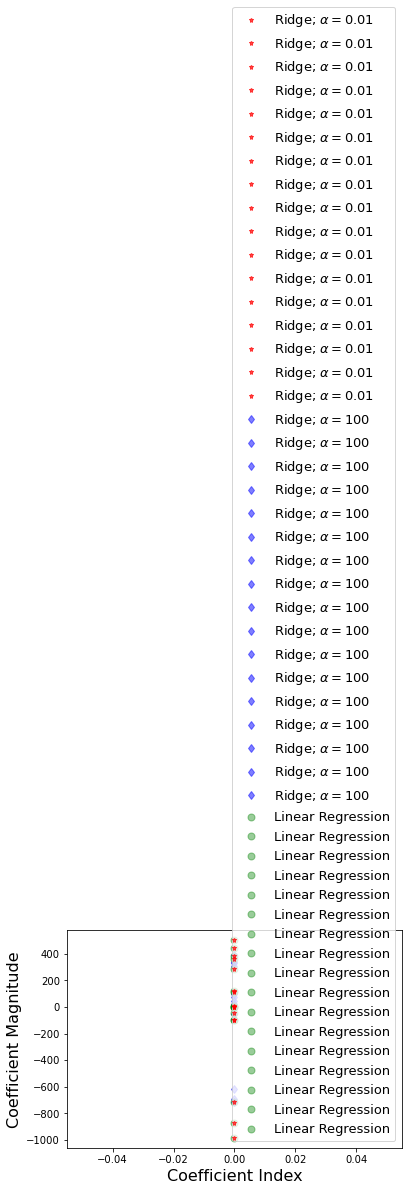

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.001) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles

rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

# make plot
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

## Apply filter method for all routes

Functionality builds a dataframe where features with a value of 1 present at least 0.05 correlation to total journey time for each route. Otherwise value is 0.

In [35]:
# create an empty dataframe to build selected features
col_names = list(chunks[0].keys())
print(col_names)

df_dict = {}

for col in col_names:
    df_dict[f'{col}'] = []
    
#route_features_df = pd.DataFrame(df_dict)
#route_features_df

['PLANNEDTIME_DEP', 'ROUTEID', 'TOTAL_JOURNEY_TIME', 'rain', 'temp', 'wet_bulb_temp(C)', 'dew_pt_temp(C)', 'vapour_pressure(hPa)', 'humidity(%)', 'sea_lvl_pressure(hPa)', 'sin_hour_of_day', 'cos_hour_of_day', 'friday', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday']


In [36]:
df_dict

{'PLANNEDTIME_DEP': [],
 'ROUTEID': [],
 'TOTAL_JOURNEY_TIME': [],
 'rain': [],
 'temp': [],
 'wet_bulb_temp(C)': [],
 'dew_pt_temp(C)': [],
 'vapour_pressure(hPa)': [],
 'humidity(%)': [],
 'sea_lvl_pressure(hPa)': [],
 'sin_hour_of_day': [],
 'cos_hour_of_day': [],
 'friday': [],
 'monday': [],
 'saturday': [],
 'sunday': [],
 'thursday': [],
 'tuesday': [],
 'wednesday': []}

In [37]:

def addFeaturesToDict(df):
    """Adds the selected features into the dictionary to be used to create DataFrame for all routes."""


    def selectFeatures(df):
        """Uses Pearson correlation to select features with at least 0.05 score.
        
        Selected features returned as a list."""
        cor = df.corr()


        def correctSinCos(features_series):
            '''Checks presence of sin/cos pair in relevant features.

            Adds other if only one is found. Adds both if none are found.'''

            features = list(features_series.keys())

            cos = 'cos_hour_of_day'
            sin = 'sin_hour_of_day'

            if (sin in features) & (cos in features):
                pass

            elif (sin not in features) & (cos not in features):
                features.append(sin)
                features.append(cos)

            elif (sin in features) & (cos not in features):
                features.append(cos)

            else:
                features.append(sin)

            return features

        #Correlation with output variable
        cor_target = abs(cor["TOTAL_JOURNEY_TIME"])
        #Selecting highly correlated features
        relevant_features = cor_target[cor_target>0.05]


        selected_features = correctSinCos(relevant_features)
        return selected_features

    
    
    selected = selectFeatures(df)
    
    routeid = df['ROUTEID'].unique()[0]
    
    for col in list(df_dict.keys()):
        if col == 'ROUTEID':
            df_dict['ROUTEID'].append(routeid)
        elif col in selected and col != 'ROUTEID':
            df_dict[f'{col}'].append(1)
        elif col not in selected and col != 'ROUTEID':
            df_dict[f'{col}'].append(0)
        




In [38]:
for df in chunks:
    addFeaturesToDict(df)

In [39]:
df_dict

{'PLANNEDTIME_DEP': [1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

In [40]:
for i in df_dict:
    print(len(df_dict[i]))

305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305


In [41]:
len(chunks)

305

In [42]:
list(df_dict.keys())

['PLANNEDTIME_DEP',
 'ROUTEID',
 'TOTAL_JOURNEY_TIME',
 'rain',
 'temp',
 'wet_bulb_temp(C)',
 'dew_pt_temp(C)',
 'vapour_pressure(hPa)',
 'humidity(%)',
 'sea_lvl_pressure(hPa)',
 'sin_hour_of_day',
 'cos_hour_of_day',
 'friday',
 'monday',
 'saturday',
 'sunday',
 'thursday',
 'tuesday',
 'wednesday']

In [43]:
feature_selection_df = pd.DataFrame(df_dict)

In [44]:
feature_selection_df

,PLANNEDTIME_DEP,ROUTEID,TOTAL_JOURNEY_TIME,rain,temp,wet_bulb_temp(C),dew_pt_temp(C),vapour_pressure(hPa),humidity(%),sea_lvl_pressure(hPa),sin_hour_of_day,cos_hour_of_day,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,18_3,1,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1
1,1,67_6,1,0,1,1,0,0,1,0,1,1,1,0,1,1,1,1,1
2,1,142_9,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,0,0
3,1,17_16,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,0,0
4,1,46A_74,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1,17A_14,1,0,1,1,1,1,0,0,1,1,0,1,1,0,0,1,0
301,1,66A_38,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1
302,1,15A_85,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1
303,1,47_136,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1


In [45]:
feature_selection_df.to_csv('LR_feature_selection.csv', index=False)

# Examine results across all routes

In [46]:
# read chunks in again as they may have been altered in previous cells
chunks2 = get_chunks(data_list)

Index at chunk_list 0  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/18_3.csv :  (3896, 19)
Index at chunk_list 1  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/67_6.csv :  (4001, 19)
Index at chunk_list 2  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/142_9.csv :  (252, 17)
Index at chunk_list 3  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/17_16.csv :  (307, 16)
Index at chunk_list 4  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/46A_74.csv :  (11186, 19)
Index at chunk_list 5  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/122_14.csv :  (4164, 19)
Index at chunk_list 6  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/150_8.csv :  (4907, 19)
Index at chunk_list 7  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/33X_49.csv :  (181, 17)
Index at chunk_list 8  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/83_19.csv :  (1051, 16)
Index at chunk_list 9  is  ../../Pelin/Chunks/D

Index at chunk_list 82  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/151_18.csv :  (831, 19)
Index at chunk_list 83  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/238_15.csv :  (1521, 19)
Index at chunk_list 84  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/79A_27.csv :  (2485, 19)
Index at chunk_list 85  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/7_73.csv :  (781, 19)
Index at chunk_list 86  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/69_47.csv :  (592, 18)
Index at chunk_list 87  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/13_66.csv :  (469, 19)
Index at chunk_list 88  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/32_58.csv :  (2233, 19)
Index at chunk_list 89  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/145_91.csv :  (285, 17)
Index at chunk_list 90  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/66_13.csv :  (1448, 19)
Index at chunk_list 91  is  ../../Pelin

Index at chunk_list 167  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/25A_270.csv :  (4648, 19)
Index at chunk_list 168  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/32_57.csv :  (2165, 19)
Index at chunk_list 169  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/41B_53.csv :  (391, 19)
Index at chunk_list 170  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/53_23.csv :  (172, 18)
Index at chunk_list 171  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/44_36.csv :  (1845, 19)
Index at chunk_list 172  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/61_106.csv :  (1760, 19)
Index at chunk_list 173  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/41C_78.csv :  (4171, 19)
Index at chunk_list 174  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/65B_66.csv :  (1992, 19)
Index at chunk_list 175  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/49_27.csv :  (3171, 19)
Index at chunk_list 176 

Index at chunk_list 244  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/25A_273.csv :  (4475, 19)
Index at chunk_list 245  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/17_11.csv :  (303, 16)
Index at chunk_list 246  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/17A_18.csv :  (224, 18)
Index at chunk_list 247  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/13_63.csv :  (291, 17)
Index at chunk_list 248  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/66B_59.csv :  (846, 18)
Index at chunk_list 249  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/37_15.csv :  (4984, 19)
Index at chunk_list 250  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/145_105.csv :  (8051, 19)
Index at chunk_list 251  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/16_24.csv :  (7436, 19)
Index at chunk_list 252  is  ../../Pelin/Chunks/DBUS/Predictive_Model_Chunks_backup/17A_16.csv :  (234, 18)
Index at chunk_list 253  i

In [61]:
mae_all = []
mse_all = []
rmse_all = []
r2_all = []
CV_mae_all = []
CV_rmse_all = []
CV_r2_all = []

results_df=pd.DataFrame()

In [62]:
def getPickle(df):
    """File to generate complete pickel file for a dataframe.
    
    Selects features based on feature selection recommendation in table"""
    
    def get_sourcefeatures(file, ROUTEID):
        df = pd.read_csv(file, low_memory=False)
        targetrow_df= df[df.ROUTEID == ROUTEID ]
        features_list=[]
        for column in targetrow_df.columns.values:
            if targetrow_df.iloc[0][column]==1:
                features_list.append(column)
        features_list.remove('TOTAL_JOURNEY_TIME')
        return features_list
    
    global mae_all
    global mse_all
    global rmse_all
    global r2_all
    global CV_mae_all
    global CV_rmse_all
    global CV_r2_all
    global results_df
    
    # shuffle
    df = df.sample(frac=1)
    source_features = get_sourcefeatures('LR_feature_selection.csv', df['ROUTEID'].unique()[0])
    y=df['TOTAL_JOURNEY_TIME']
    X=df[source_features]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    LR = LinearRegression().fit(X_train, y_train)
    LRprediction = LR.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, LRprediction)
    mse = metrics.mean_squared_error(y_test, LRprediction)
    rmse = metrics.mean_squared_error(y_test, LRprediction)**0.5
    r2 = metrics.r2_score(y_test, LRprediction)
    
    mae_all.append(mae)
    mse_all.append(mse)
    rmse_all.append(rmse)
    r2_all.append(r2)
    
    # 3-fold CV
    
    accuracyR2 = cross_val_score(LinearRegression(), X, y, scoring='r2', cv = 3)
    CV_r2_all.append(accuracyR2.mean())
    
    accuracyMAE = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_absolute_error', cv = 10)
    CV_mae_all.append(accuracyMAE.mean())
    
    accuracyRMSE = cross_val_score(LinearRegression(), X, y, scoring='neg_root_mean_squared_error', cv = 10)
    CV_rmse_all.append(accuracyRMSE.mean())
    
    # generate pickle file
    routeid = df['ROUTEID'].unique()[0]
    filename = routeid+'.pkl'
    with open(f'pickle_files/{filename}', 'wb') as handle:
        pickle.dump(LinearRegression(), handle, pickle.HIGHEST_PROTOCOL)
        
    # create a dataframe of the results
    modelname ='LR'
    data = [[modelname, routeid, accuracyMAE.mean(), accuracyRMSE.mean(), accuracyR2.mean()]]
    row_df = pd.DataFrame( data, columns=['MODEL','ROUTEID','MAE', 'RMSE','R2'])
    results_df = pd.concat([results_df,row_df],axis=0,ignore_index=True)
    

In [63]:
count = 0
for chunk in chunks2:
    print(f'generating pickel for chunk index {count}')
    getPickle(chunk)
    count +=1

generating pickel for chunk index 0
generating pickel for chunk index 1
generating pickel for chunk index 2
generating pickel for chunk index 3
generating pickel for chunk index 4
generating pickel for chunk index 5
generating pickel for chunk index 6
generating pickel for chunk index 7
generating pickel for chunk index 8
generating pickel for chunk index 9
generating pickel for chunk index 10
generating pickel for chunk index 11
generating pickel for chunk index 12
generating pickel for chunk index 13
generating pickel for chunk index 14
generating pickel for chunk index 15
generating pickel for chunk index 16
generating pickel for chunk index 17
generating pickel for chunk index 18
generating pickel for chunk index 19
generating pickel for chunk index 20
generating pickel for chunk index 21
generating pickel for chunk index 22
generating pickel for chunk index 23
generating pickel for chunk index 24
generating pickel for chunk index 25
generating pickel for chunk index 26
generating 

generating pickel for chunk index 219
generating pickel for chunk index 220
generating pickel for chunk index 221
generating pickel for chunk index 222
generating pickel for chunk index 223
generating pickel for chunk index 224
generating pickel for chunk index 225
generating pickel for chunk index 226
generating pickel for chunk index 227
generating pickel for chunk index 228
generating pickel for chunk index 229
generating pickel for chunk index 230
generating pickel for chunk index 231
generating pickel for chunk index 232
generating pickel for chunk index 233
generating pickel for chunk index 234
generating pickel for chunk index 235
generating pickel for chunk index 236
generating pickel for chunk index 237
generating pickel for chunk index 238
generating pickel for chunk index 239
generating pickel for chunk index 240
generating pickel for chunk index 241
generating pickel for chunk index 242
generating pickel for chunk index 243
generating pickel for chunk index 244
generating p

In [64]:
def getListMean(arr):
    return sum(arr) / len(arr)

MAEs = getListMean(mae_all)
MSEs = getListMean(mse_all)
RMSEs = getListMean(rmse_all)
r2s = getListMean(r2_all)
CV_MAEs = getListMean(CV_mae_all)
CV_RMSEs = getListMean(CV_rmse_all)
CV_r2s = getListMean(CV_r2_all)

In [65]:
for metric in [MAEs, MSEs, RMSEs, r2s, CV_MAEs, CV_RMSEs, CV_r2s]:
    print(metric)
    print('='*50)

446.74733092535746
422982.4375017766
621.4439942275445
0.3953156550588193
-445.01643997510223
-615.5115615535769
0.3937337676304928


In [66]:
results_df

,MODEL,ROUTEID,MAE,RMSE,R2
0,LR,18_3,-556.100497,-771.472957,0.532877
1,LR,67_6,-480.625830,-657.069444,0.499952
2,LR,142_9,-240.838205,-312.249741,-0.639395
3,LR,17_16,-254.136951,-365.833124,0.491733
4,LR,46A_74,-517.405659,-733.803363,0.476387
...,...,...,...,...,...
300,LR,17A_14,-477.869465,-608.757888,0.461600
301,LR,66A_38,-482.103855,-743.511583,0.344223
302,LR,15A_85,-481.389148,-676.637689,0.417968
303,LR,47_136,-559.519239,-765.639875,0.468914


In [1]:
import seaborn as sns